## Importing dependencies

In [ ]:
import pandas as pd
import geopandas as gpd
import fiona
from shapely.geometry import Point
import matplotlib.pyplot as plt

## Loading data

In [31]:
hospital_data_to_load = "hospitals.csv"
hospitals = pd.read_csv(hospital_data_to_load, encoding='latin-1')
hospitals.head()

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,CLAVE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,CLAVE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA JURISDICCION,NOMBRE DE LA INSTITUCION,...,CLAVE ESTRATO UNIDAD,TIPO OBRA,CLAVE TIPO OBRA,HORARIO DE ATENCION,AREAS Y SERVICIOS,ULTIMO MOVIMIENTO,FECHA ULTIMO MOVIMIENTO,CERTIFICACION CSG,TIPO CERTIFICACION,VIGENCIA CERTIFICACION
0,ASDIF000011,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
1,ASDIF000023,AGUASCALIENTES,1,COSÍO,4,COSIO,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
2,ASDIF000035,AGUASCALIENTES,1,RINCÓN DE ROMOS,7,RINCON DE ROMOS,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
3,ASDIF000040,AGUASCALIENTES,1,TEPEZALÁ,9,TEPEZALA,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
4,ASDIF000052,AGUASCALIENTES,1,CALVILLO,3,CALVILLO,1,CALVILLO,3,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN


## Filtering Data to obtain only hospitals

In [33]:
hospitals = hospitals.loc[(hospitals["NOMBRE TIPO ESTABLECIMIENTO"] == "DE HOSPITALIZACIÓN")]
hospitals.head()


,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,CLAVE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,CLAVE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA JURISDICCION,NOMBRE DE LA INSTITUCION,...,CLAVE ESTRATO UNIDAD,TIPO OBRA,CLAVE TIPO OBRA,HORARIO DE ATENCION,AREAS Y SERVICIOS,ULTIMO MOVIMIENTO,FECHA ULTIMO MOVIMIENTO,CERTIFICACION CSG,TIPO CERTIFICACION,VIGENCIA CERTIFICACION
8,ASIMS000016,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,INSTITUTO MEXICANO DEL SEGURO SOCIAL,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2015-10-08,NO CERTIFICADO,NO ESPECIFICADO,NaN
9,ASIMS000021,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,INSTITUTO MEXICANO DEL SEGURO SOCIAL,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2015-10-08,NO CERTIFICADO,NO ESPECIFICADO,NaN
23,ASIMS000161,AGUASCALIENTES,1,JESÚS MARÍA,5,JESUS MARIA [EJIDO],469,AGUASCALIENTES,1,INSTITUTO MEXICANO DEL SEGURO SOCIAL,...,2.0,OBRA NUEVA,1.0,"URGENCIAS - L,M,X,J,V,S,D, DE 00:00:00 A 12:00...",URGENCIAS - URGENCIAS | INFECTOLOGÍA - HOSPITA...,ALTA,2018-01-06,NaN,NaN,NaN
24,ASIST000016,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES PA...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2015-10-08,NO CERTIFICADO,NO ESPECIFICADO,NaN
41,ASSMP000016,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,SERVICIOS MEDICOS PRIVADOS,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2014-01-17,NO CERTIFICADO,NO ESPECIFICADO,NaN


In [34]:
hospitals.columns


Index(['CLUES', 'NOMBRE DE LA ENTIDAD', 'CLAVE DE LA ENTIDAD',
       'NOMBRE DEL MUNICIPIO', 'CLAVE DEL MUNICIPIO', 'NOMBRE DE LA LOCALIDAD',
       'CLAVE DE LA LOCALIDAD', 'NOMBRE DE LA JURISDICCION',
       'CLAVE DE LA JURISDICCION', 'NOMBRE DE LA INSTITUCION',
       'CLAVE DE LA INSTITUCION', 'CLAVE CORTA DE LA INSTITUCION',
       'NOMBRE TIPO ESTABLECIMIENTO', 'CLAVE TIPO ESTABLECIMIENTO',
       'NOMBRE DE TIPOLOGIA', 'CLAVE DE TIPOLOGIA', 'NOMBRE DE SUBTIPOLOGIA',
       'CLAVE DE SUBTIPOLOGIA', 'CLAVE SCIAN', 'DESCRIPCION CLAVE SCIAN',
       'CONSULTORIOS DE MED GRAL', 'CONSULTORIOS EN OTRAS AREAS',
       'TOTAL DE CONSULTORIOS', 'CAMAS EN AREA DE HOS', 'CAMAS EN OTRAS AREAS',
       'TOTAL DE CAMAS', 'NOMBRE DE LA UNIDAD', 'CLAVE DE VIALIDAD',
       'TIPO DE VIALIDAD', 'VIALIDAD', 'NUMERO EXTERIOR', 'NUMERO INTERIOR',
       'CLAVE DEL TIPO DE ASENTAMIENTO', 'TIPO DE ASENTAMIENTO',
       'ASENTAMIENTO', 'ENTRE TIPO DE VIALIDAD 1', 'ENTRE VIALIDAD 1',
       'ENTRE TIPO

In [35]:
#Selecting rows relevant for mapping
hospitals = hospitals[['CLUES', 'NOMBRE DE LA ENTIDAD', 'CLAVE DE LA INSTITUCION', 'ESTATUS DE OPERACION', 'LONGITUD', 'LATITUD']]
hospitals.head()     

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,ESTATUS DE OPERACION,LONGITUD,LATITUD
8,ASIMS000016,AGUASCALIENTES,IMSS,EN OPERACION,-102.254162,21.876488
9,ASIMS000021,AGUASCALIENTES,IMSS,EN OPERACION,-102.294179,21.866216
23,ASIMS000161,AGUASCALIENTES,IMSS,EN OPERACION,-102.30862200603497,21.95677724974312
24,ASIST000016,AGUASCALIENTES,ISSSTE,EN OPERACION,-102.307437,21.901974
41,ASSMP000016,AGUASCALIENTES,SMP,EN OPERACION,-102.28450387716293,21.882726


In [36]:
#Selecting only active hospitals
hospitals = hospitals.loc[(hospitals["ESTATUS DE OPERACION"] == "EN OPERACION")]
hospitals.head()

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,ESTATUS DE OPERACION,LONGITUD,LATITUD
8,ASIMS000016,AGUASCALIENTES,IMSS,EN OPERACION,-102.254162,21.876488
9,ASIMS000021,AGUASCALIENTES,IMSS,EN OPERACION,-102.294179,21.866216
23,ASIMS000161,AGUASCALIENTES,IMSS,EN OPERACION,-102.30862200603497,21.95677724974312
24,ASIST000016,AGUASCALIENTES,ISSSTE,EN OPERACION,-102.307437,21.901974
41,ASSMP000016,AGUASCALIENTES,SMP,EN OPERACION,-102.28450387716293,21.882726


In [38]:
#Saving the new data frame to csv
hospitals.to_csv('map_hospitals.csv')

## Reloading clean data

In [44]:
data_to_load = "map_hospitals.csv"
df = pd.read_csv(data_to_load, encoding='latin-1')
df.head()

,Unnamed: 0,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,ESTATUS DE OPERACION,LONGITUD,LATITUD
0,8,ASIMS000016,AGUASCALIENTES,IMSS,EN OPERACION,-102.254162,21.876488
1,9,ASIMS000021,AGUASCALIENTES,IMSS,EN OPERACION,-102.294179,21.866216
2,23,ASIMS000161,AGUASCALIENTES,IMSS,EN OPERACION,-102.308622,21.956777
3,24,ASIST000016,AGUASCALIENTES,ISSSTE,EN OPERACION,-102.307437,21.901974
4,41,ASSMP000016,AGUASCALIENTES,SMP,EN OPERACION,-102.284504,21.882726


In [45]:
df['Coordinates'] = list(zip(df.LONGITUD, df.LATITUD))

In [46]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [57]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

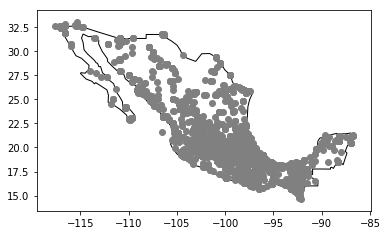

In [59]:
#All hospitals in Mexico
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='grey')

plt.show()

In [50]:
#Selecting only hospitals ISSSTE
imss = df.loc[(df["CLAVE DE LA INSTITUCION"] == "IMSS")]
imss.head()


,Unnamed: 0,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,ESTATUS DE OPERACION,LONGITUD,LATITUD,Coordinates
0,8,ASIMS000016,AGUASCALIENTES,IMSS,EN OPERACION,-102.254162,21.876488,POINT (-102.254162 21.876488)
1,9,ASIMS000021,AGUASCALIENTES,IMSS,EN OPERACION,-102.294179,21.866216,POINT (-102.294179 21.866216)
2,23,ASIMS000161,AGUASCALIENTES,IMSS,EN OPERACION,-102.308622,21.956777,POINT (-102.308622 21.95677725)
32,294,BCIMS000011,BAJA CALIFORNIA,IMSS,EN OPERACION,-116.605672,31.857040,POINT (-116.605672 31.85704)
33,304,BCIMS000110,BAJA CALIFORNIA,IMSS,EN OPERACION,-115.466105,32.662184,POINT (-115.466105 32.662184)


In [51]:
gdf = gpd.GeoDataFrame(imss, geometry='Coordinates')

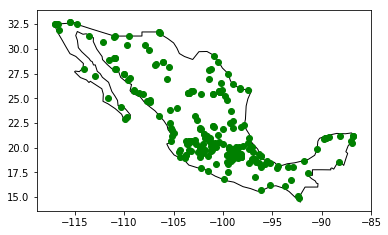

In [52]:
#All hospitals imss in Mexico
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='green')

plt.show()

In [53]:
#Selecting only hospitals ISSSTE
issste = df.loc[(df["CLAVE DE LA INSTITUCION"] == "ISSSTE")]
issste.head()

,Unnamed: 0,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,ESTATUS DE OPERACION,LONGITUD,LATITUD,Coordinates
3,24,ASIST000016,AGUASCALIENTES,ISSSTE,EN OPERACION,-102.307437,21.901974,POINT (-102.307437 21.901974)
39,338,BCIST000011,BAJA CALIFORNIA,ISSSTE,EN OPERACION,-116.607728,31.850272,POINT (-116.607728 31.850272)
40,341,BCIST000040,BAJA CALIFORNIA,ISSSTE,EN OPERACION,-115.476380,32.643800,POINT (-115.47638 32.6438)
41,346,BCIST000093,BAJA CALIFORNIA,ISSSTE,EN OPERACION,-116.984823,32.508255,POINT (-116.984823 32.508255)
258,1244,BSIST000014,BAJA CALIFORNIA SUR,ISSSTE,EN OPERACION,-111.646000,25.034000,POINT (-111.646 25.034)


In [54]:
gdf = gpd.GeoDataFrame(issste, geometry='Coordinates')

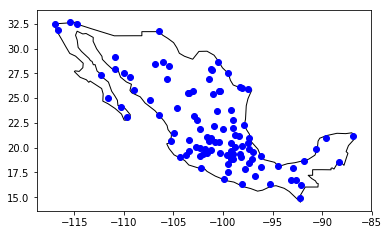

In [55]:
#All hospitals ISSSTE in Mexico
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='blue')

plt.show()

In [60]:
#Selecting only active hospitals
ssa = df.loc[(df["CLAVE DE LA INSTITUCION"] == "SSA")]
ssa.head()

,Unnamed: 0,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,ESTATUS DE OPERACION,LONGITUD,LATITUD,Coordinates
23,134,ASSSA000030,AGUASCALIENTES,SSA,EN OPERACION,-102.255516,21.855710,POINT (-102.255516 21.85571)
24,135,ASSSA000042,AGUASCALIENTES,SSA,EN OPERACION,-102.253156,21.856559,POINT (-102.2531563 21.85655946)
25,136,ASSSA000054,AGUASCALIENTES,SSA,EN OPERACION,-102.355320,21.839200,POINT (-102.3553202 21.83920013)
26,171,ASSSA000404,AGUASCALIENTES,SSA,EN OPERACION,-102.703249,21.848345,POINT (-102.7032486 21.84834534)
27,192,ASSSA000614,AGUASCALIENTES,SSA,EN OPERACION,-102.279334,22.149965,POINT (-102.279334 22.149965)


In [62]:
gdf = gpd.GeoDataFrame(ssa, geometry='Coordinates')

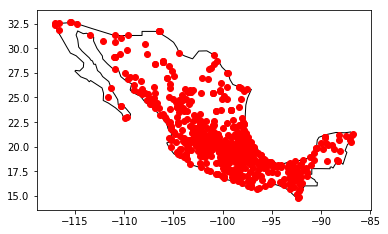

In [63]:
#All hospitals SSA in Mexico
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()